In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
# y = 2x + 3 + noise
np.random.seed(42)
X = np.random.rand(100, 1).astype(np.float32)  # 100 samples, 1 feature
y = 2 * X + 3 + 0.1 * np.random.randn(100, 1).astype(np.float32)

# Convert data to PyTorch tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

In [ ]:
# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output feature

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
model = LinearRegressionModel()

In [ ]:

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean squared error
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Stochastic gradient descent

# Train the model
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    predictions = model(X_tensor)
    loss = criterion(predictions, y_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.1400
Epoch [200/1000], Loss: 0.0197
Epoch [300/1000], Loss: 0.0162
Epoch [400/1000], Loss: 0.0142
Epoch [500/1000], Loss: 0.0127
Epoch [600/1000], Loss: 0.0116
Epoch [700/1000], Loss: 0.0107
Epoch [800/1000], Loss: 0.0100
Epoch [900/1000], Loss: 0.0096
Epoch [1000/1000], Loss: 0.0092


Learned weight: 2.0662, Learned bias: 2.9647


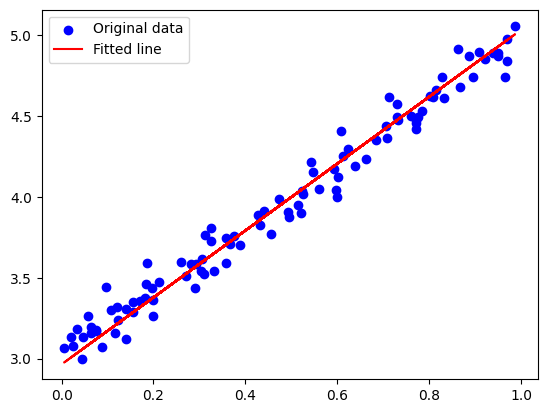

In [ ]:
# Extract learned parameters
[w, b] = model.linear.weight.detach().numpy(), model.linear.bias.detach().numpy()
print(f"Learned weight: {w[0][0]:.4f}, Learned bias: {b[0]:.4f}")

# Plot the results
predicted = model(X_tensor).detach().numpy()
plt.scatter(X, y, label="Original data", color="blue")
plt.plot(X, predicted, label="Fitted line", color="red")
plt.legend()
plt.show()